Loading the important libraries:

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet
import seaborn as sn
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Flight Data.xlsx')
df.head()

Airline     Source Destination Dep_Time Arrival_Time Duration  \
0    Air India  New Delhi      Mumbai    07:00        09:00   2h 00m   
1    Air India  New Delhi      Mumbai    09:00        11:15   2h 15m   
2    Air India  New Delhi      Mumbai    15:05        18:10   3h 05m   
3    Air India  New Delhi      Mumbai    17:50        21:35   3h 45m   
4  Jet Airways  New Delhi      Mumbai    07:55        10:15   2h 20m   

  Total_Stops Additional_Info  Price (in ₹)  
0    Non Stop       Free Meal          2476  
1    Non Stop       Free Meal          2476  
2      1 stop       Free Meal          2791  
3      1 stop       Free Meal          2791  
4    Non Stop       Free Meal          3173

In [3]:
df.shape

(1550, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1550 non-null   object
 1   Source           1550 non-null   object
 2   Destination      1550 non-null   object
 3   Dep_Time         1550 non-null   object
 4   Arrival_Time     1550 non-null   object
 5   Duration         1550 non-null   object
 6   Total_Stops      1550 non-null   object
 7   Additional_Info  1550 non-null   object
 8   Price (in ₹)     1550 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 109.1+ KB


In [5]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price (in ₹)       0
dtype: int64

<AxesSubplot:>

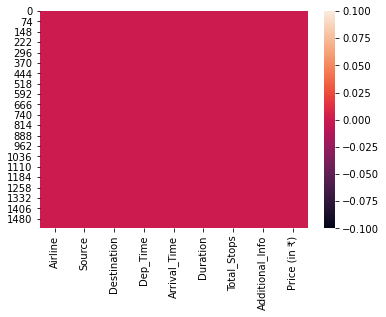

In [6]:
sn.heatmap(df.isnull())

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

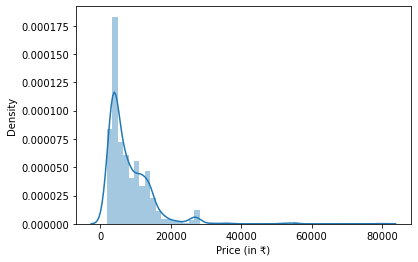

In [7]:
sn.distplot(df['Price (in ₹)'])

<AxesSubplot:xlabel='Price (in ₹)'>

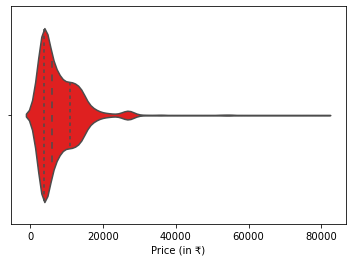

In [8]:
sn.violinplot(x=df['Price (in ₹)'], inner="quartile", color="red")

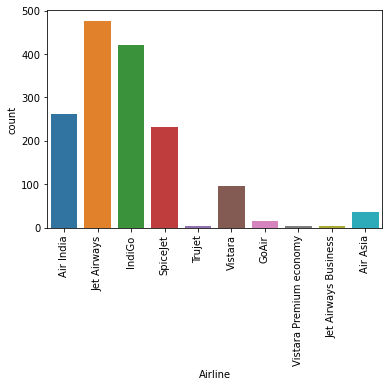

In [9]:
sn.countplot(df['Airline'])
plt.xticks(rotation=90)
plt.show()

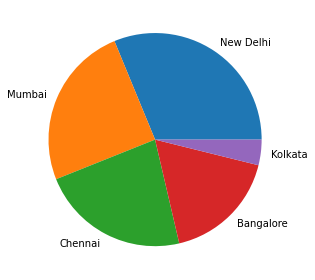

In [10]:
plt.pie(df['Source'].value_counts(), labels=df['Source'].unique(),shadow=False)
plt.tight_layout()
plt.show()

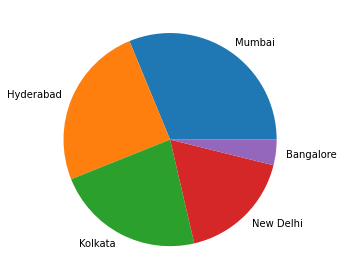

In [11]:
plt.pie(df['Destination'].value_counts(), labels=df['Destination'].unique(),shadow=False)
plt.tight_layout()
plt.show()

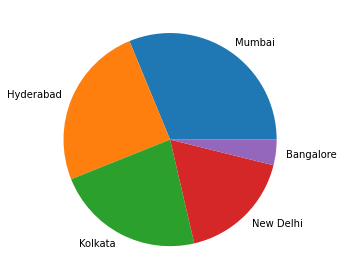

In [12]:
plt.pie(df['Destination'].value_counts(), labels=df['Destination'].unique(),shadow=False)
plt.tight_layout()
plt.show()


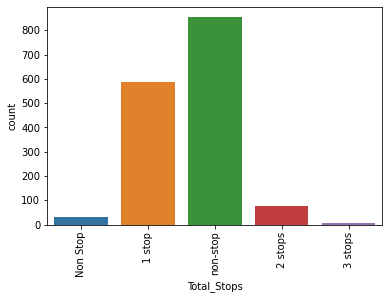

In [13]:
sn.countplot(df['Total_Stops'])
plt.xticks(rotation=90)
plt.show()

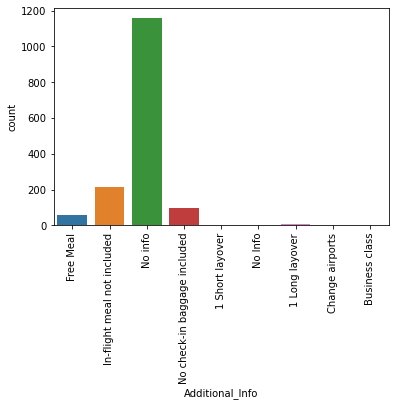

In [14]:
sn.countplot(df['Additional_Info'])
plt.xticks(rotation=90)
plt.show()


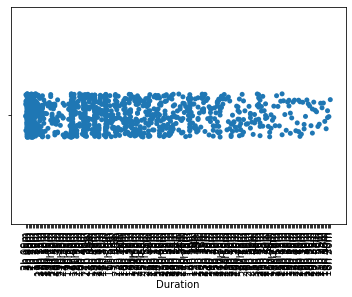

In [15]:
sn.stripplot(df['Duration'])
plt.xticks(rotation=90)
plt.show()

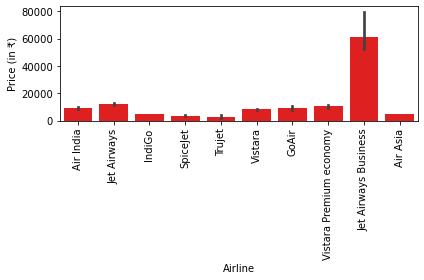

In [16]:
sn.barplot(x=df['Airline'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

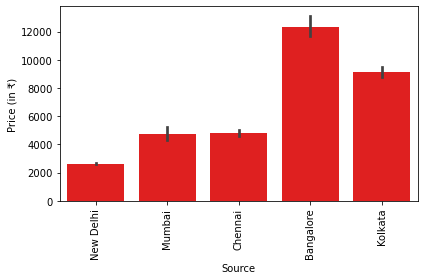

In [17]:
sn.barplot(x=df['Source'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

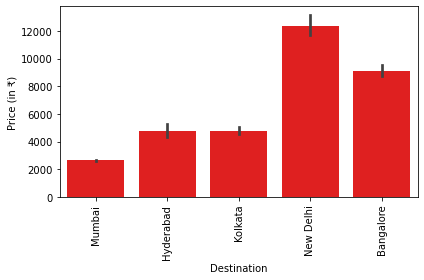

In [18]:
sn.barplot(x=df['Destination'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

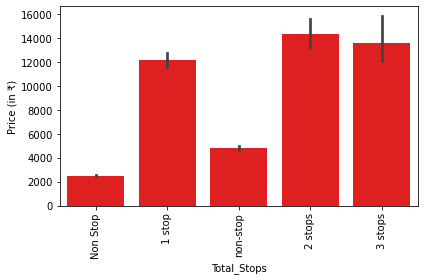

In [19]:
sn.barplot(x=df['Total_Stops'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

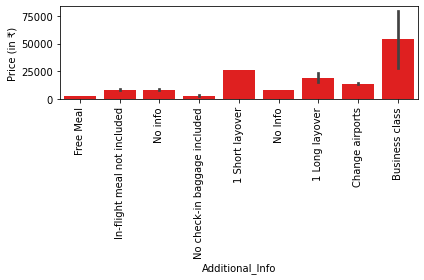

In [20]:
sn.barplot(x=df['Additional_Info'],y=df['Price (in ₹)'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

In [21]:
df.drop(['Price (in ₹)'],axis=1).astype('category')
le=LabelEncoder()
cnt=0
for col in df:
    if df[col].dtype=='object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        cnt += 1
df        

Airline  Source  Destination  Dep_Time  Arrival_Time  Duration  \
0           1       4            3        25           142       149   
1           1       4            3        41           214       150   
2           1       4            3        84           298       166   
3           1       4            3       109           355       169   
4           4       4            3        31           186       151   
...       ...     ...          ...       ...           ...       ...   
1545        1       0            4        34           307         0   
1546        1       0            4         0           398       105   
1547        4       0            4        60           352       219   
1548        3       0            4       111           352       158   
1549        3       0            4        51           241       158   

      Total_Stops  Additional_Info  Price (in ₹)  
0               3                4          2476  
1               3                4          2476  
2               0                4          2791  
3               0                4          2791  
4               3                4          3173  
...           ...              ...           ...  
1545            0                8          4943  
1546            0                8         10394  
1547            0                0         27992  
1548            4                8          7648  
1549            4                8          7648  

[1550 rows x 9 columns]

<AxesSubplot:>

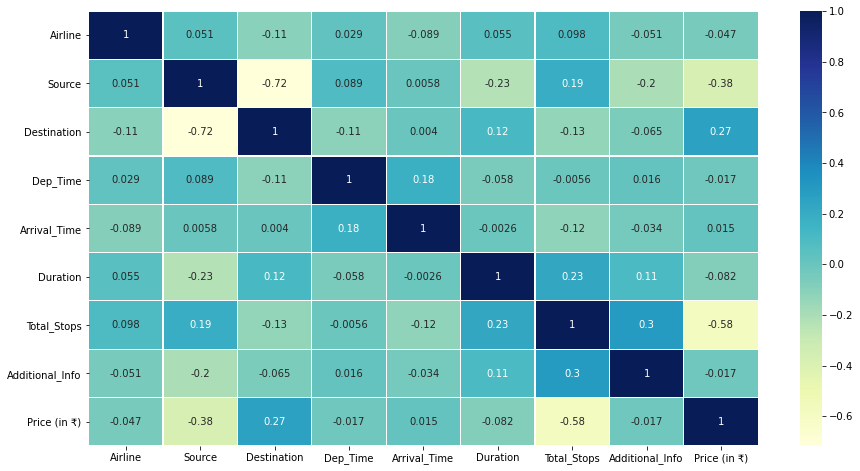

In [22]:
a=df.corr()
plt.figure(figsize=(15,8))
sn.heatmap(a,linewidth=0.1, cmap="YlGnBu", annot = True)

# Outliers Detection:

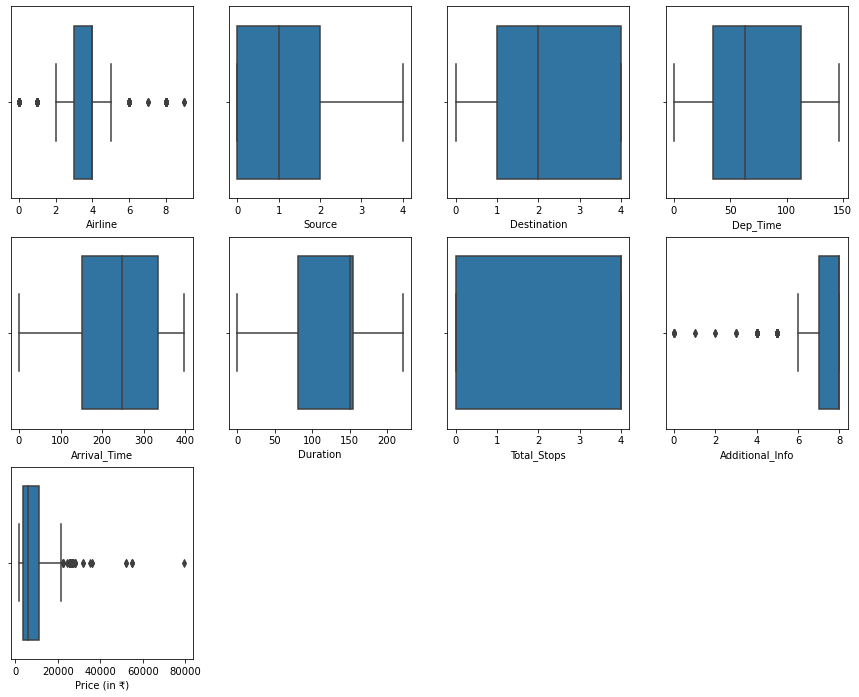

In [23]:
plt.figure(figsize=(15,12))
plot=1
for i in df:
    if plot<=10:
        plt.subplot(3,4,plot)
        sn.boxplot(df[i])
        plt.xlabel(i)
        plot=plot+1
plt.show();

In [24]:
from scipy.stats import zscore
z =np.abs(zscore(df))
print(z.shape)
df =df.loc[(z<3).all(axis=1)]
print(df.shape)

(1550, 9)
(1517, 9)


In [25]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price (in ₹)       0
dtype: int64

In [26]:
df.skew()

Airline            0.386520
Source             0.353493
Destination        0.122416
Dep_Time           0.148426
Arrival_Time      -0.335739
Duration          -0.503434
Total_Stops       -0.356846
Additional_Info   -1.608395
Price (in ₹)       1.391778
dtype: float64

# Skewness:

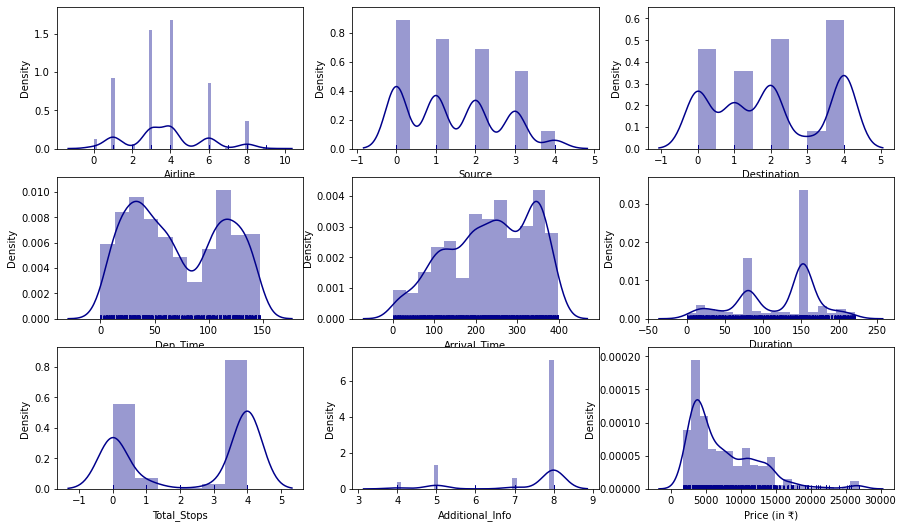

In [27]:
plt.figure(figsize=(15,12))
plot=1
for i in df:
    if plot<=10:
        plt.subplot(4,3,plot)
        sn.distplot(df[i],rug=True,color='Darkblue')
        plt.xlabel(i)
        plot=plot+1
plt.show();

In [28]:
x = df.drop(['Price (in ₹)'],axis=1)
y = df['Price (in ₹)']

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_value=ss.fit_transform(x)

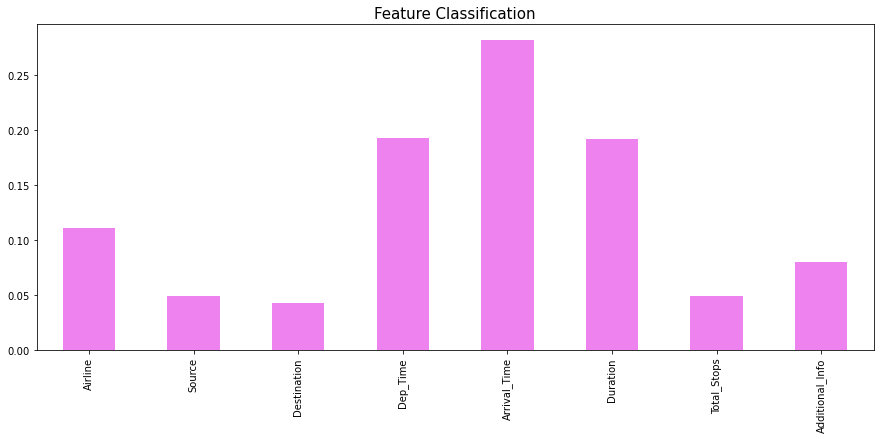

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
plt.figure(figsize=(15,6))
plt.title('Feature Classification',fontsize=15,)
feature=pd.Series(extra.feature_importances_,index=x.columns)
feature.plot(kind='bar',color='violet')
plt.show();

# PCA:

In [31]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [32]:
pca=PCA()
pca.fit_transform(scaled_value)

array([[-1.19774711,  0.54095377,  1.89511515, ...,  1.86930226,
        -1.09959869,  0.87382419],
       [-1.273043  ,  0.77142594,  1.21964401, ...,  1.72209381,
        -1.23907934,  0.85618168],
       [-1.3026316 ,  2.07726264,  0.26214736, ...,  1.6321449 ,
        -0.18853239,  1.27545852],
       ...,
       [ 2.09392374,  1.57950411, -0.31693992, ..., -1.49147324,
        -0.31782271,  0.13428833],
       [ 1.73315688, -0.20451226, -1.66532196, ...,  0.37040352,
        -0.77561308, -0.06163276],
       [ 1.99771599, -0.68589161, -0.13779444, ...,  0.14775864,
        -0.6506411 , -0.04987331]])

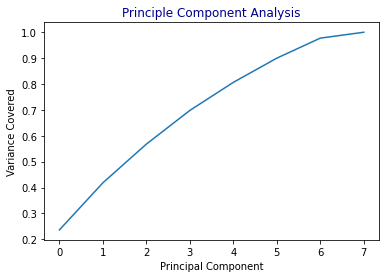

In [33]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('Principle Component Analysis',color='darkblue')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [35]:
x_train, y_test ,x_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [36]:
def maxr2_score(clf,x,y):   
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sn.regplot(pred,y_test)
    
    
    return final_r
        
        

max r2 score corresponding to 93 is 60.947736442751676
cross validation score 24.503099993723207
Standard Deviation 26.86955234914198
Training accuracy 54.996739480790716
Test Accuracy 55.22556304669358
MAE 2327.073027246684
MSE 10887937.447869053
RMSE 3299.6874773028208




93

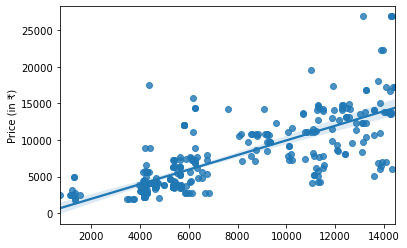

In [37]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 93 is 60.95304169254979
cross validation score 24.526684532037883
Standard Deviation 26.855565908047147
Training accuracy 54.996730420871785
Test Accuracy 55.22399348637301
MAE 2327.007260546682
MSE 10888319.122676238
RMSE 3299.7453117894174




93

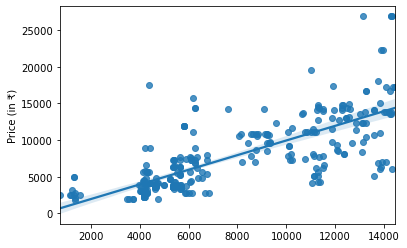

In [38]:
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 93 is 60.95041247627759
cross validation score 24.511731873084255
Standard Deviation 26.875748030150476
Training accuracy 54.99673317578486
Test Accuracy 55.22566176040773
MAE 2327.113528015082
MSE 10887913.443351787
RMSE 3299.6838399082703




93

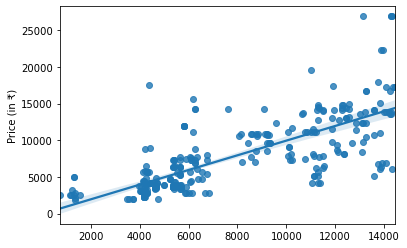

In [39]:
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 62 is 89.94268381325877
cross validation score 56.39313110564844
Standard Deviation 39.795130430935906
Training accuracy 95.51131543082572
Test Accuracy 82.15990848969408
MAE 1131.081046678905
MSE 4338229.883963434
RMSE 2082.8417808281633




62

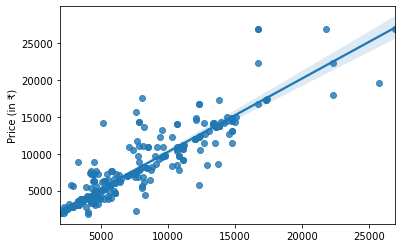

In [40]:
dt2=DecisionTreeRegressor()
maxr2_score(dt2,x,y)

max r2 score corresponding to 91 is 68.95781121274366
cross validation score 13.05405648268765
Standard Deviation 53.80860003874511
Training accuracy 72.0756032855256
Test Accuracy 56.249000841880495
MAE 2024.8105263157893
MSE 10639064.933684211
RMSE 3261.7579514249996




91

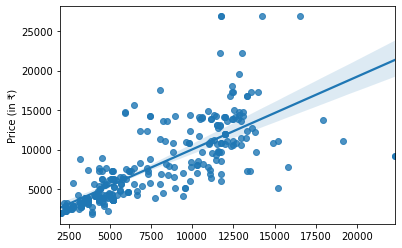

In [41]:
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 62 is 88.5758814746356
cross validation score 58.937202124489374
Standard Deviation 41.356571604092046
Training accuracy 94.19547464645126
Test Accuracy 83.40134393344438
MAE 1204.248240439769
MSE 4036346.2115631104
RMSE 2009.0660047801093




62

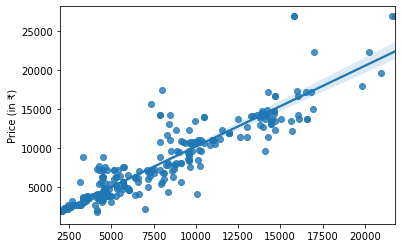

In [42]:
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 83 is 58.90087189897641
cross validation score 16.347899625326217
Standard Deviation 34.72967976156175
Training accuracy 50.77448154676934
Test Accuracy 51.17625819941929
MAE 2535.2217333808503
MSE 11872619.353092201
RMSE 3445.666750150426




83

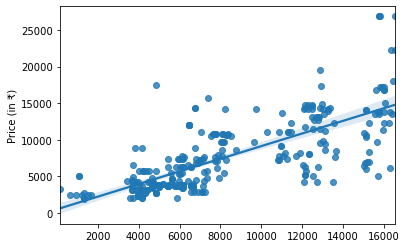

In [43]:
Adb=AdaBoostRegressor(base_estimator=lasso)
maxr2_score(Adb,x,y)

max r2 score corresponding to 87 is 84.87873563810811
cross validation score 52.219580048053075
Standard Deviation 27.425219813955735
Training accuracy 84.2096303399765
Test Accuracy 77.40155492826054
MAE 1607.5664558865499
MSE 5495333.344265182
RMSE 2344.2127344302994




87

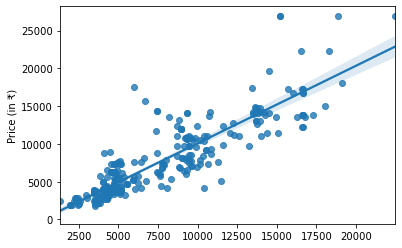

In [44]:
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

In [51]:
# ada=AdaBoostRegressor(n_estimators=200,random_state=0)
# ada.fit(x_train,y_train)
# pred=ada.predict(x_test)
# print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
# print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
# print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
# print('R_2 score:',r2_score(pred,y_test)*100)
# sn.regplot(pred,y_test,color='g')

# Hyperparameter Tuning:

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=.20)
ridge=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1],'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
glf=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'alpha': 1, 'solver': 'lsqr'}

In [47]:
ridge1=Ridge(alpha=1,solver='svd')
ridge1.fit(x_train,y_train)
pred=ridge1.predict(x_test)
print('Training accuracy',ridge1.score(x_train,y_train)*100)
print('Test Accuracy',ridge1.score(x_test,y_test)*100)
print('\n')

print('Error:')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 score',r2_score(pred,y_test)*100)


Training accuracy 56.53929484143872
Test Accuracy 48.47138251429819


Error:
MAE 2391.368266934392
MSE 11783801.308775513
RMSE 3432.7541870596433
R2 score 17.572795296522482


In [48]:
import joblib
joblib.dump(ridge1,'flight_price.pkl')

['flight_price.pkl']

In [49]:
loaded_model=joblib.load('flight_price.pkl')
prediction=loaded_model.predict(x_test)

In [50]:
prediction

array([11886.34484493,  5214.26050147,  5331.34984788,   914.43505871,
        1191.68431607, 11011.89686526,  5796.11982412,  5290.42791976,
        5331.34984788,  6102.89863271, 10830.99536456,  3438.85653141,
        4069.9220371 ,  3966.95315105,  7965.81430871, 12361.80461066,
         914.43505871,  8782.19039802,  6102.89863271, 10188.64953694,
        5525.88908442, 13212.99286538, 10188.64953694,  5214.26050147,
        6536.65562372,  3651.0219022 ,  5297.66741036, 13928.57800665,
       11350.64103093,  5214.26050147, 13578.09575097,  5525.88908442,
       10222.2010479 ,  6727.61562476, 11428.71770577, 12561.83370244,
        5290.42791976,  3895.30463097,  6164.97157791,  5331.34984788,
       12026.17681364,  5421.11955892, 10915.51156344, 12256.49130813,
       11106.73832106, 11350.95796022,  5796.11982412,   923.28855423,
         914.43505871,  4741.28850494,  4175.75857528, 11481.22657582,
       11228.95473586,  4528.62190108,  6102.89863271,  5421.11955892,
      